In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/dataset.csv')

In [ ]:
df.head()

,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,over.react,change.in.eating,suicidal.thought,feeling.tired,close.friend,social.media.addiction,weight.gain,material.possessions,introvert,popping.up.stressful.memory,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,Disorder
0,yes,yes,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,Anxiety
1,no,no,no,no,no,no,yes,yes,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,Depression
2,no,no,no,no,no,no,no,no,no,no,no,no,yes,yes,yes,yes,yes,yes,no,no,no,no,no,no,Loneliness
3,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,yes,yes,yes,yes,yes,Stress
4,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,Normal


In [ ]:
df.columns

Index(['feeling.nervous', 'panic', 'breathing.rapidly', 'sweating',
       'trouble.in.concentration', 'having.trouble.in.sleeping',
       'having.trouble.with.work', 'hopelessness', 'anger', 'over.react',
       'change.in.eating', 'suicidal.thought', 'feeling.tired', 'close.friend',
       'social.media.addiction', 'weight.gain', 'material.possessions',
       'introvert', 'popping.up.stressful.memory', 'having.nightmares',
       'avoids.people.or.activities', 'feeling.negative',
       'trouble.concentrating', 'blamming.yourself', 'Disorder'],
      dtype='object')

In [ ]:
df = df.replace('yes', 1)
df = df.replace('no',0)
print(df)

       feeling.nervous  panic  ...  blamming.yourself    Disorder
0                    1      1  ...                  0     Anxiety
1                    0      0  ...                  0  Depression
2                    0      0  ...                  0  Loneliness
3                    0      0  ...                  1      Stress
4                    0      0  ...                  0      Normal
...                ...    ...  ...                ...         ...
40955                1      1  ...                  0     Anxiety
40956                0      0  ...                  0  Depression
40957                0      0  ...                  0  Loneliness
40958                0      0  ...                  1      Stress
40959                0      0  ...                  0      Normal

[40960 rows x 25 columns]


In [ ]:
df = df.replace('Anxiety', 1)
df = df.replace('Depression', 2)
df = df.replace('Loneliness', 3)
df = df.replace('Stress', 4)
df = df.replace('Normal', 5)
print(df)

       feeling.nervous  panic  ...  blamming.yourself  Disorder
0                    1      1  ...                  0         1
1                    0      0  ...                  0         2
2                    0      0  ...                  0         3
3                    0      0  ...                  1         4
4                    0      0  ...                  0         5
...                ...    ...  ...                ...       ...
40955                1      1  ...                  0         1
40956                0      0  ...                  0         2
40957                0      0  ...                  0         3
40958                0      0  ...                  1         4
40959                0      0  ...                  0         5

[40960 rows x 25 columns]


In [ ]:
df.head()

,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,over.react,change.in.eating,suicidal.thought,feeling.tired,close.friend,social.media.addiction,weight.gain,material.possessions,introvert,popping.up.stressful.memory,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,Disorder
0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,4
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [ ]:
x,y=df,df.Disorder
x.drop('Disorder',axis=1)
df3=df.copy()
del df['Disorder']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
a=pd.read_csv('/content/Test.csv')

In [ ]:
predictions = logisticRegr.predict(x_test)

In [ ]:
score = logisticRegr.score(x_test, y_test)
print("Accuracy: ",score*100)

Accuracy:  100.0


In [ ]:
predictions

array([4, 4, 3, ..., 2, 3, 4])

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[1965    0    0    0    0]
 [   0 2058    0    0    0]
 [   0    0 2086    0    0]
 [   0    0    0 2062    0]
 [   0    0    0    0 2069]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [ ]:
df.columns

Index(['feeling.nervous', 'panic', 'breathing.rapidly', 'sweating',
       'trouble.in.concentration', 'having.trouble.in.sleeping',
       'having.trouble.with.work', 'hopelessness', 'anger', 'over.react',
       'change.in.eating', 'suicidal.thought', 'feeling.tired', 'close.friend',
       'social.media.addiction', 'weight.gain', 'material.possessions',
       'introvert', 'popping.up.stressful.memory', 'having.nightmares',
       'avoids.people.or.activities', 'feeling.negative',
       'trouble.concentrating', 'blamming.yourself'],
      dtype='object')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


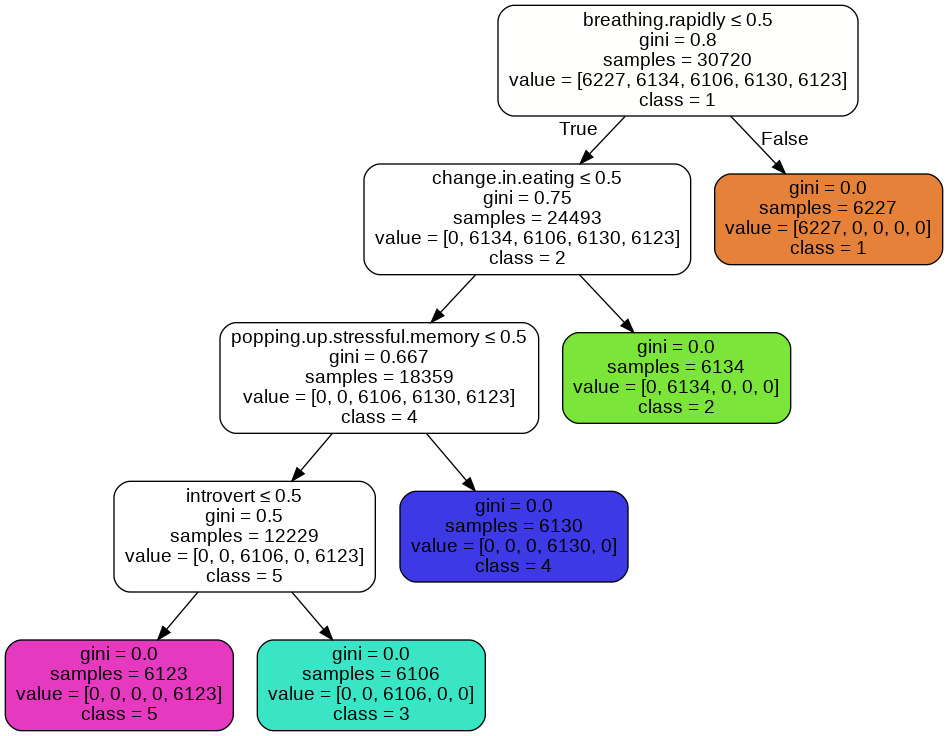

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
feature_cols = ['feeling.nervous', 'panic', 'breathing.rapidly', 'sweating',
       'trouble.in.concentration', 'having.trouble.in.sleeping',
       'having.trouble.with.work', 'hopelessness', 'anger', 'over.react',
       'change.in.eating', 'suicidal.thought', 'feeling.tired', 'close.friend',
       'social.media.addiction', 'weight.gain', 'material.possessions',
       'introvert', 'popping.up.stressful.memory', 'having.nightmares',
       'avoids.people.or.activities', 'feeling.negative',
       'trouble.concentrating', 'blamming.yourself']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2','3','4','5'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Disorder.png')
Image(graph.create_png())